# **Spider 2-link leg**

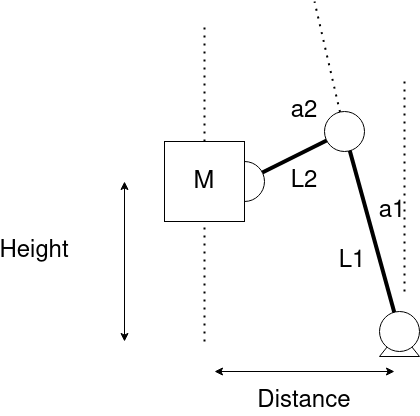

# **Dynamics equation**

\begin{equation}
\mathbf{D\ddot{a} + B = Q}\\
\mathbf{\ddot{a}= D^-(Q - B)}
\end{equation}
where:
\begin{equation}
a = 
\begin{bmatrix}
\alpha_1\\
\alpha_2
\end{bmatrix},
\dot{a} = 
\begin{bmatrix}
\dot{\alpha_1}\\
\dot{\alpha_2}
\end{bmatrix},
\ddot{a} = 
\begin{bmatrix}
\ddot{\alpha_1}\\
\ddot{\alpha_2}
\end{bmatrix}\\
Q =
\begin{bmatrix}
0\\
u
\end{bmatrix}
\end{equation}
\begin{equation}
\mathbf{\ddot{h}= J\ddot{a} + \dot{J}\dot{a}}\\
x = 
\begin{bmatrix}
\dot{h}\\
\ddot{h}
\end{bmatrix}\\
\end{equation}

In [219]:
from sympy import *
from numpy.linalg import eig
from numpy import pi, linspace, array, dot, diag, concatenate, zeros
import math as mt
import numpy as np
s = 50, 0.6 # alpha, beta

# M = M.subs([('m', 0.5), ('L1', 0.2), ('L2', 0.1), ('I1', 0.4), ('I2', 0.2), ('g', 9.86)])
# D = D.subs([('a1', 0.5), ('a2', 1)])

a1 = symbols('a1')
a2 = symbols('a2')
da1 = symbols('da1')
dda1 = symbols('dda1')
da2 = symbols('da2')
dda2 = symbols('dda2')
h = symbols('h')

g = symbols('g')
I1 = symbols('I1')
I2 = symbols('I2')
m = symbols('m')
L1 = symbols('L1')
L2 = symbols('L2')

# Define state vector field: f(x)
h_symb = L1 * cos(a1) + L2 * cos(a1 + a2)
dh_symb = da1 * diff(h_symb, a1) + da2 * diff(h_symb, a2)
dh_symb = dh_symb.simplify()
dh_symb2 = expand(dh_symb * dh_symb)
pprint(dh_symb)

L_symb = 0.5 * I1 * da1**2 + 0.5 * I2 * da2**2 + 0.5 * m * dh_symb2 - m * g * h_symb
L_symb = expand(L_symb)
# pprint(diff(L_symb, a1))
# # Find analytical expression of jacobian
# J_symb = Matrix([f_symb]).jacobian(x)

# J_num = lambdify([x], J_symb)

-L₁⋅da₁⋅sin(a₁) - L₂⋅da₁⋅sin(a₁ + a₂) - L₂⋅da₂⋅sin(a₁ + a₂)


In [220]:
dL_da1 = expand(diff(L_symb, a1))
dL_dda1 = expand(diff(L_symb, da1))
dL_dda2 = expand(diff(L_symb, da2))
dL_da2 = expand(diff(L_symb, a2))
ddL_dda1dt = dda1*diff(dL_dda1, da1) + dda2*diff(dL_dda1, da2) + da1*diff(dL_dda1, a1) + da2*diff(dL_dda1, a2)
ddL_dda2dt = dda1*diff(dL_dda2, da1) + dda2*diff(dL_dda2, da2) + da1*diff(dL_dda2, a1) + da2*diff(dL_dda2, a2)
f1 = expand(ddL_dda1dt - dL_da1)
f2 = expand(ddL_dda2dt - dL_da2)


#fint ushami. dda1 is removed with derivative on dda1 so its coefficients are able to put into a matrix
f11 = diff(f1, dda1)
f12 = diff(f1, dda2)
f21 = diff(f2, dda1)
f22 = diff(f2, dda2)
# pprint(f11)

In [221]:
dda = Matrix([[dda1],
            [dda2]])
da = Matrix([[da1],
            [da2]])
u = symbols('u')
Q = Matrix([[0],
           [u]])
D = Matrix([[f11, f12],
           [f21, f22]])
f1b = (f1 - dda1*f11 - dda2*f12).simplify()
f2b = (f2 - dda1*f21 - dda2*f22).simplify()
B = Matrix([[f1b],
            [f2b]])
# pprint(B)

In [222]:
invD = expand(D.inv())
dda = invD * (Q - B)
# invD = simplify(invD)

In [223]:
J_symb = Matrix([[ expand(diff(h_symb, a1)) , expand(diff(h_symb, a2))]])
dJ_symb = Matrix([[ expand(diff(dh_symb, a1)) , expand(diff(dh_symb, a2))]])

f = (dJ_symb * da - J_symb * invD * B)[0]
b = (J_symb * invD)[1] # only a2 is controlled
pprint(f + b*u)
def f_term(a, da, params):
    return f.subs('a1', a[0]).subs('a2', a[1]).subs('da1', da[1]).subs('da2', da[1]).subs('g', params[0]).subs('I1', params[1]).subs('I2', params[2]).subs('m', params[3]).subs('L1', params[4]).subs('L2', params[5])

def b_term(a, da, params):

    return b.subs('a1', a[0]).subs('a2', a[1]).subs('da1', da[1]).subs('da2', da[1]).subs('g', params[0]).subs('I1', params[1]).subs('I2', params[2]).subs('m', params[3]).subs('L1', params[4]).subs('L2', params[5])


       ⎛     ⎛                                                                
       ⎜     ⎜                                                              1.
- L₂⋅m⋅⎜- L₂⋅⎜────────────────────────────────────────────────────────────────
       ⎜     ⎜                     2      2                     2      2      
       ⎝     ⎝1.0⋅I₁⋅I₂ + 1.0⋅I₁⋅L₂ ⋅m⋅sin (a₁ + a₂) + 1.0⋅I₂⋅L₁ ⋅m⋅sin (a₁) +

                                                                              
0⋅I₁                                                                          
───────────────────────────────────────────────────────────────── + ──────────
                                                2      2                      
 2.0⋅I₂⋅L₁⋅L₂⋅m⋅sin(a₁)⋅sin(a₁ + a₂) + 1.0⋅I₂⋅L₂ ⋅m⋅sin (a₁ + a₂)   1.0⋅I₁⋅I₂ 

                                                    2      2                  
                                              1.0⋅L₁ ⋅m⋅sin (a₁)              
──────────────────────────────────────────────────

In [224]:
def get_angles(distance, height, L1, L2):
    cosq2 = (height**2 + distance**2 - L1**2 - L2**2) / (2 * L1 * L2)
    sinq2 = np.sqrt(1 - cosq2**2)
    q2 = mt.atan2( sinq2, cosq2)
    q1 = mt.atan2(height, distance) - mt.atan2( L2*sinq2, L1 + L2*cosq2)
    return q1, q2
    
def get_velocities(dheight, a, L1, L2):
    a1, a2 = a
    A = L1 * cos(a1) + L2 * cos(a1 + a2)
    B = L2 * cos(a1 + a2)
    C = L1 * sin(a1) + L2 * sin(a1 + a2)
    D = L2 * sin(a1 + a2)
    E = -dheight
    da1 = -E * B / (D * A - B * C)
    da2 = E * A / (D * A - B * C)
    return da1, da2

In [225]:
def trajectory( traj_params,t):
    A = traj_params['A']
    nu = traj_params['nu']
    '''
    for trajectory
    '''
    h_d = A*np.cos(nu*t) + A
    dh_d = -A*nu*np.sin(nu*t)
    ddh_d = -A*(nu**2)*np.cos(nu*t)

    '''
    for height

    h_d = A
    dh_d = 0
    ddh_d = 0
    '''
    return h_d, dh_d, ddh_d 

# **Feedback linearization**

In [226]:
control_params = {}
Kp = 100
Kd = 20
control_params['Kp'] = Kp
control_params['Kd'] = Kd
control_params['traj'] = {'A':0.3, 'nu':4}

# Manipulator parameters

g = 9.81
I1 = 0.6
I2 = 0.4
m = 0.2
L1 = 0.5
L2 = 0.3
distance = 0.3
params =  g, I1, I2, m, L1, L2, distance
'''
for m = m
'''
#aprox_params = params
'''
for m != m
'''
aprox_params = 1.1*g, 0.9*I1, 1.3*I2, 0.8*m, 1.5*L1, 0.9*L2

control_params['system_params'] = aprox_params

In [227]:
def sysode(x, t, control, params, control_params):
    h, dh = x[0], x[1]
    g, I1, I2, m, L1, L2, distance = params

    # Calculate control
    a = get_angles(distance, h, L1, L2)
    da = get_velocities(dh, a, L1, L2)
    u = control(x, t, params, control_params)

    ddh = f_term(a, da, params) + b_term(a, da, params) * u

    dx = dh, ddh, u

    return dx


In [228]:
def control(x, t, params, control_params):
    h, dh = x[0], x[1]
    g, I1, I2, m, L1, L2, distance = params
    a = get_angles(distance, h, L1, L2)
    da = get_velocities(dh, a, L1, L2)

    Kp = control_params['Kp']
    Kd = control_params['Kd']
    h_d, dh_d, ddh_d = trajectory( control_params['traj'], t)

    fm = f_term(a, da, control_params['system_params'])
    Kph = Kp * (h - h_d)
    Kdh = Kd * (dh - dh_d)
    bm = b_term(a, da, control_params['system_params'])
    u =  ( -fm - Kph - Kdh + ddh_d) / bm
    return u

$$\ddot{x} + 2\zeta\omega + \omega^2 = 0$$
critically damped:
$$\zeta=1$$
Let $$\lambda_{12}= -10\Rightarrow\omega = \frac{10}{\zeta}$$
So:$$K_p = 100$$ $$K_d = 20$$

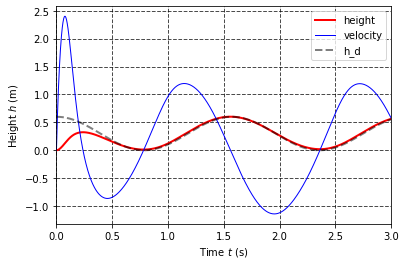

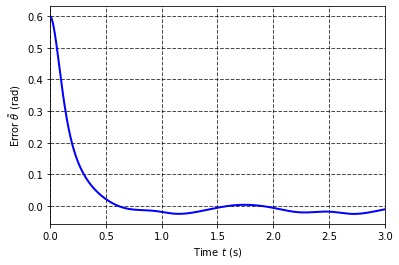

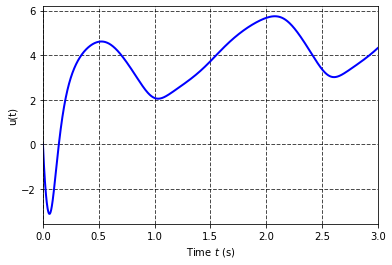

In [229]:
from scipy.integrate import odeint

# Integration
t0 = 0 # Initial time 
tf = 3 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
hd = np.zeros(len(t))
for i in range(len(t)):
    hd[i], dhd, ddhd= trajectory( control_params['traj'], t[i])

x0 = [0, 0, 0] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
sol = sol.transpose()
q, dq, u_t = sol[0], sol[1], sol[2]


from matplotlib.pyplot import *
plot(t, q,'r', linewidth=2.0, label = 'height')
plot(t, dq,'b', linewidth=1.0, label = 'velocity')
plot(t, hd, 'black', linestyle = '--', alpha = 0.5,  linewidth=2.0, label = 'h_d')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Height $h$ (m)')
xlabel(r'Time $t$ (s)')
show()

plot(t, hd - q,'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'Error ${\tilde{\theta}}$ (rad)')
xlabel(r'Time $t$ (s)')
show()
plot(t, u_t, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'u(t)')
xlabel(r'Time $t$ (s)')
show()

# **Robust control**

In [230]:
def sys_oder(x, t, control, system_params, controler_params):
    h, dh = x[0], x[1]
    g, I1, I2, m, L1, L2, distance = params

    # Calculate control
    a = get_angles(distance, h, L1, L2)
    da = get_velocities(dh, a, L1, L2)
    u = control(x, t, system_params, controler_params)

    # State variables
    ddh = f_term(a, da, system_params) + b_term(a, da, system_params) * u

    dx = dh, ddh, u

    return dx

$$k = 100$$
$$\lambda = 20$$

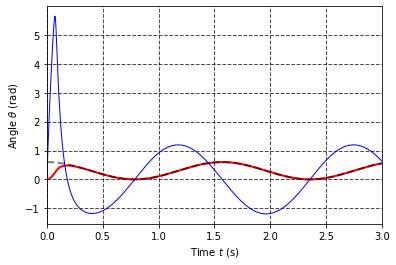

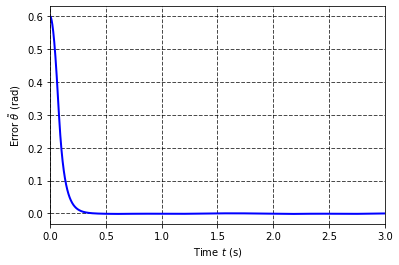

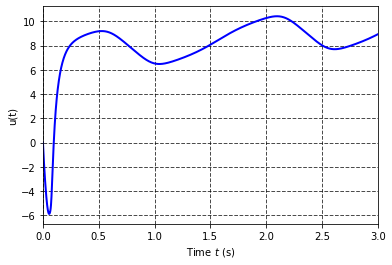

In [231]:
def controlr(x, t, system_params, controler_params):
    # theta, dtheta = x[0],x[1]
    h, dh = x[0], x[1]

    g, I1, I2, m, L1, L2, distance = system_params
    # theta_d, dtheta_d, ddtheta_d = trajectory( controler_params['traj'], t)
    
    lambd = controler_params['lambda']

    h_d, dh_d, ddh_d = trajectory( controler_params['traj'], t)
    a = get_angles(distance, h, L1, L2)
    da = get_velocities(dh, a, L1, L2)


    Lh = lambd * (h - h_d)
    Ldh = lambd * (dh - dh_d)

    fm = f_term(a, da, controler_params['system_params'])#controler_params['system_params'])
    bm = b_term(a, da, controler_params['system_params'])#controler_params['system_params'])
    u =  ( -fm - Ldh + ddh_d) / bm

    k = controler_params['k']
    s = (dh - dh_d) + Lh
    th = np.tanh(s)
    u_s =  - k * th / b_term(a, da, controler_params['system_params'])

    return u + u_s



controler_params = {}
controler_params['lambda'] = 20
controler_params['traj'] = {'A':0.3, 'nu':4}
controler_params['system_params'] = aprox_params
controler_params['k'] = 100

x0 = [0, 0, 0] # Set initial state 

sol = odeint(sys_oder, x0, t, args=(controlr, params, controler_params,))
sol = sol.transpose()
q, dq, u_t = sol[0], sol[1], sol[2]

from matplotlib.pyplot import *

plot(t, q,'r', linewidth=2.0, label = 'height')
plot(t, dq,'b', linewidth=1.0, label = 'velocity')
plot(t, hd, 'black', linestyle = '--', alpha = 0.5,  linewidth=2.0, label = 'h_d')
# plot(t, theta,'r', linewidth=2.0)
# plot(t, theta_d,color = 'black', linestyle = '--', alpha = 0.5)
# hlines(controler_params['theta_d'], t0, tf,color = 'black', linestyle = '--')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

plot(t, hd - q,'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'Error ${\tilde{\theta}}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

plot(t, u_t, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'u(t)')
xlabel(r'Time $t$ (s)')
show()